In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import pprint as pp
import datetime
import pathlib


filename = "/Users/dgrosz/Documents/PayPal/testData/IrisDB_large1.csv" #must insert absolute filepath
f_b = filename[:filename.rfind("/")]
d_b = filename[filename.rfind("/"):filename.rfind(".")]
VIZ_PATH = f_b + d_b + "_Viz_Stats/"
pathlib.Path(VIZ_PATH).mkdir(exist_ok=True)
print(VIZ_PATH)

/Users/dgrosz/Documents/PayPal/testData/IrisDB_large1_Viz_Stats/


If a filename is provided and it is a CSV, the data will be loaded into X. If not, a random numerical dataset with one column of some missing data will be loaded.

In [2]:
def read_data(filename):
# to test with clean numerics
    if len(filename) == 0:
        sz = 50000
        X = pd.DataFrame(np.random.randint(0,100,size=(sz, 23)), columns=list('ABCDEFGHIJMNOPQRSTUVWXY'))
        nans = [1, np.nan] * int(sz / 2)
        Y = pd.DataFrame(nans, columns=list('Z'))
        X = pd.concat([X, Y], axis=1, sort=False)
        return X
    else:
        # to test with command line arg
        return pd.read_csv(filename, parse_dates=True)

    
print("Reading data...")
X = read_data(filename)
print("Data is read.")
X


Reading data...


/Users/dgrosz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (8,14,21,42,57,58,59,61) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Data is read.


,display_dt,Status,Number of Records,TTA_min,TTA_notnull,close_dt,ack_ts,ack_ts_notnull,ackuid,agent,...,tags,tally,ticket_ts,ticketid,ticketsystem,ticketuid,tot_alerts_per_tid,update_by,update_ts,url
0,6/1/18 11:14,new,1.0,0.0000,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sherlock.paypalcorp.com/MySherlockApp...
1,6/1/18 11:14,new,1.0,0.0000,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sherlock.paypalcorp.com/MySherlockApp...
2,6/1/18 9:31,expired,1.0,0.0000,0.0,6/1/18 10:25,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
3,6/1/18 9:31,expired,1.0,0.0000,0.0,6/1/18 10:30,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
4,6/1/18 10:13,expired,1.0,0.0000,0.0,6/1/18 11:15,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
5,6/1/18 10:43,expired,1.0,0.0000,0.0,6/1/18 11:45,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
6,6/1/18 10:37,expired,1.0,0.0000,0.0,6/1/18 12:15,NaN,0.0,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
7,6/1/18 11:13,expired,1.0,0.0000,0.0,6/1/18 12:15,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
8,6/1/18 12:02,expired,1.0,0.0000,0.0,6/1/18 13:15,NaN,0.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://engineering.paypalcorp.com/condor/host...
9,6/1/18 12:02,expired,1.0,0.0000,0.0,6/1/18 13:55,NaN,0.0,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://engineering.paypalcorp.com/condor/host...


Going through each column, each column will be categorized as either a numerical or categorical column. 
A column is numerical if it the column's values have a numerical type and have more than 10 unique values or no unique values (this means it's only missing values and will be easier to clean out later). Numerical columns collect boxplot data (min-25%-median-75%-max) as well as non-null data count, missing data count, and standard deviation.
A column is categorical if it is perceived as an object or category column by pandas or is numerical and has between 1 and 10 unique values. Categorical columns also collect non-null and null data counts. Mode, mode frequency, and number of unique values is also collected.
For the entire dataset, row count, column count, missing data count, and missing data rate is collected.


In [3]:
def get_data_stats(X):
    df_stats_name = ["rows", "cols", "missing", "missing_rate"]
    df_stats_builder = [np.nan] * 4
    df_stats_builder[0], df_stats_builder[1] = int(X.shape[0]), int(X.shape[1])

    col_stats_name = ["count", "missing", "mean", "std", "min", "25%", "50%", "75%", "max", "unique", "top", "freq"]
    n_stats = len(col_stats_name)
    col_stats_toAppend = list(list())

    cat_data_valCounts = {}

    X_numeric, X_cat, X_date = pd.DataFrame(), pd.DataFrame(),pd.DataFrame()
    L_Xn, L_Xc, L_Xd = list(), list(), list()

    usable_col_names = list()
    for c in list(X):
        stat_c = [np.nan] * n_stats

        if X[c].dtype.name == 'category' or X[c].dtype.name == 'object':
            # is categorical
            stat_c = [X[c].count(), X[c].isnull().sum(), np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
                      X[c].nunique(), X[c].mode().iloc[0], X[c].value_counts().max()]
            isDate = False

            #Linearly comb through column to see if date
            for r in X[c]:
                try:
                    dt = datetime.datetime.strptime(str(r), "%m/%d/%y %H:%M")
                    isDate = True
                    break
                except ValueError:
                    if not str(r).lower() == "nan" and not str(r).lower() == "na" and re.search('[a-zA-Z]', str(r)):
                        break
                    pass  # do nothing
                try:
                    dt = datetime.datetime.strptime(str(r), "%m-%d-%y %H:%M")
                    isDate = True
                    break
                except ValueError:
                    continue  # skip to next
            if isDate:
                print("Column \"" + c + "\" is a DATE")
                print("Converting column...")
                X[c] = pd.to_datetime(X[c])
                L_Xd.append(c)
                stat_c = [X[c].count(), X[c].isnull().sum(), np.nan, np.nan, X[c].min(), np.nan, np.nan, np.nan,
                          X[c].max(), np.nan, X[c].mode().iloc[0], X[c].value_counts().max()]
                print("done")
            else:
                print("Column \"" + c + "\" is a CATEGORY")
                cat_data_valCounts[c] = X[c].value_counts()
                L_Xc.append(c)
            usable_col_names.append(c)
        elif (np.issubdtype(X[c].dtype, np.number)):
            # then is numerical
            print("Column \"" + c + "\" is a NUMERICAL")
            stat_c = [X[c].count(), X[c].isnull().sum(), X[c].mean(), X[c].std(), X[c].min(), X[c].quantile(.25),
                      X[c].median(), X[c].quantile(.75), X[c].max(), np.nan, np.nan, np.nan]
            n_unique = float(X[c].nunique())
            if n_unique > 10 or n_unique == 0:
                L_Xn.append(c)
            else:
                cat_data_valCounts[c] = X[c].value_counts()
                L_Xc.append(c)
                print("But column \"" + c + "\" is corrected to a CATEGORY because there are " + str(
                    int(n_unique)) + " unique numerical values.")
            usable_col_names.append(c)
        else:
            print("Column \"" + c + "\" is skipped because it is of an UNIDENTIFIED type.")
            print(X[c].dtype)
            continue
        col_stats_toAppend.append(stat_c)

    col_stats = pd.DataFrame(
        pd.DataFrame(data=col_stats_toAppend, columns=col_stats_name, index=usable_col_names)).transpose()

    for c in X:
        if c in L_Xn:
            X_numeric = pd.concat([X_numeric, X[c]], axis=1, sort=False)
        elif c in L_Xc:
            X_cat = pd.concat([X_cat, X[c]], axis=1, sort=False)
        elif c in L_Xd:
            X_date = pd.concat([X_date, X[c]], axis=1, sort=False)

    df_stats_builder[2] = int(col_stats.transpose()["missing"].sum())
    df_stats_builder[3] = float(df_stats_builder[2]) / (df_stats_builder[1] * df_stats_builder[0])
    df_stats = pd.DataFrame(np.array(df_stats_builder).reshape(1, 4), columns=df_stats_name)
    col_stats.to_csv(path_or_buf=VIZ_PATH + "COLUMN_STATS.csv")
    return X_numeric, X_cat, X_date, df_stats, col_stats, cat_data_valCounts

print("Getting stats...\n")
X_numeric, X_cat, X_date, df_stats, col_stats, cat_data_valCounts = get_data_stats(X)
print("\ndone.")

Getting stats...

Column "display_dt" is a DATE
Converting column...


done
Column "Status" is a CATEGORY
Column "Number of Records" is a NUMERICAL
But column "Number of Records" is corrected to a CATEGORY because there are 1 unique numerical values.
Column "TTA_min" is a NUMERICAL
Column "TTA_notnull" is a NUMERICAL
But column "TTA_notnull" is corrected to a CATEGORY because there are 2 unique numerical values.


Column "close_dt" is a DATE
Converting column...


done
Column "ack_ts" is a NUMERICAL
Column "ack_ts_notnull" is a NUMERICAL
But column "ack_ts_notnull" is corrected to a CATEGORY because there are 2 unique numerical values.
Column "ackuid" is a CATEGORY
Column "agent" is a CATEGORY


Column "alertid" is a CATEGORY


Column "clear_ts" is a CATEGORY
Column "cleartally" is a NUMERICAL
Column "last_dt" is a DATE
Converting column...


done
Column "close_message" is a CATEGORY
Column "close_ts" is a NUMERICAL
Column "closecode" is a NUMERICAL
But column "closecode" is corrected to a CATEGORY because there are 8 unique numerical values.
Column "closeuid" is a CATEGORY


Column "colo" is a CATEGORY
Column "component" is a CATEGORY


Column "display_date" is a CATEGORY
Column "ack_dt" is a DATE
Converting column...


done
Column "display_ts" is a NUMERICAL
Column "displayuid" is a CATEGORY
Column "dsp_ts_notnull" is a NUMERICAL
But column "dsp_ts_notnull" is corrected to a CATEGORY because there are 1 unique numerical values.
Column "first_ts" is a NUMERICAL


Column "groupid" is a CATEGORY


Column "hostname" is a CATEGORY


Column "identifier" is a CATEGORY
Column "kblink" is a CATEGORY


Column "last_ts" is a NUMERICAL
Column "lastgroupid" is a CATEGORY
Column "lastseverity" is a NUMERICAL


But column "lastseverity" is corrected to a CATEGORY because there are 7 unique numerical values.
Column "message" is a CATEGORY


Column "message_md5" is a CATEGORY
Column "origin" is a CATEGORY


Column "originalgroupid" is a CATEGORY
Column "originalhostname" is a CATEGORY


Column "originalmessage" is a CATEGORY
Column "originalmessage_md5" is a CATEGORY


Column "originalseverity" is a NUMERICAL
But column "originalseverity" is corrected to a CATEGORY because there are 6 unique numerical values.


Column "originalurl" is a CATEGORY
Column "pagerdutyids" is a CATEGORY
Column "proxy_ts" is a NUMERICAL
Column "proxyip" is a NUMERICAL
Column "proxyname" is a NUMERICAL
Column "ruleid" is a NUMERICAL
Column "senderip" is a NUMERICAL
Column "sendername" is a NUMERICAL
Column "server_ts" is a NUMERICAL
Column "serverip" is a NUMERICAL
Column "servername" is a NUMERICAL
Column "severity" is a NUMERICAL
But column "severity" is corrected to a CATEGORY because there are 7 unique numerical values.


Column "suborigin" is a CATEGORY
Column "tags" is a NUMERICAL
Column "tally" is a NUMERICAL
Column "ticket_ts" is a NUMERICAL
Column "ticketid" is a CATEGORY
Column "ticketsystem" is a CATEGORY


Column "ticketuid" is a CATEGORY
Column "tot_alerts_per_tid" is a NUMERICAL
Column "update_by" is a CATEGORY
Column "update_ts" is a NUMERICAL


Column "url" is a CATEGORY



done.


In [4]:
print("df_stats below")
print(df_stats)

df_stats below
       rows  cols    missing  missing_rate
0  236024.0  64.0  5157076.0      0.341403


In [5]:
print("col_stats below")
print(col_stats)

col_stats below
                  display_dt   Status Number of Records  TTA_min TTA_notnull  \
count                 236023   236023            236023   236023      236023   
missing                    1        1                 1        1           1   
mean                     NaN      NaN                 1  3.99751    0.525606   
std                      NaN      NaN                 0  90.4298    0.499345   
min      2018-06-01 09:18:00      NaN                 1  -0.2833           0   
25%                      NaN      NaN                 1        0           0   
50%                      NaN      NaN                 1        0           1   
75%                      NaN      NaN                 1   0.7667           1   
max      2018-06-28 13:02:00      NaN                 1  11279.9           1   
unique                   NaN        9               NaN      NaN         NaN   
top      2018-06-22 02:30:00  expired               NaN      NaN         NaN   
freq                   1

In [6]:
print("X_numeric below")
X_numeric

X_numeric below


,TTA_min,ack_ts,cleartally,close_ts,display_ts,first_ts,last_ts,proxy_ts,proxyip,proxyname,...,senderip,sendername,server_ts,serverip,servername,tags,tally,ticket_ts,tot_alerts_per_tid,update_ts
0,0.0000,NaN,0,NaN,1.527877e+09,1.527877e+09,1.527877e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,0.0000,NaN,0,NaN,1.527877e+09,1.527873e+09,1.527877e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2,0.0000,NaN,0,1.527874e+09,1.527871e+09,1.527870e+09,1.527870e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,0.0000,NaN,0,1.527874e+09,1.527871e+09,1.527870e+09,1.527870e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,0.0000,NaN,0,1.527877e+09,1.527873e+09,1.527873e+09,1.527873e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5,0.0000,NaN,0,1.527879e+09,1.527875e+09,1.527875e+09,1.527875e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
6,0.0000,NaN,0,1.527881e+09,1.527875e+09,1.527873e+09,1.527877e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
7,0.0000,NaN,0,1.527881e+09,1.527877e+09,1.527877e+09,1.527877e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
8,0.0000,NaN,1,1.527884e+09,1.527880e+09,1.527878e+09,1.527880e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,0.0000,NaN,1,1.527887e+09,1.527880e+09,1.527870e+09,1.527883e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [7]:
print("X_cat below")
X_cat

X_cat below


,Status,Number of Records,TTA_notnull,ack_ts_notnull,ackuid,agent,alertid,clear_ts,close_message,closecode,...,originalseverity,originalurl,pagerdutyids,severity,suborigin,ticketid,ticketsystem,ticketuid,update_by,url
0,new,1.0,0.0,0.0,NaN,NaN,577194b19826857f39d1f1807157a4bf,NaN,NaN,NaN,...,4.0,https://sherlock.paypalcorp.com/MySherlockApp...,NaN,4.0,PAS_CC_charge_create_FDMS_HSBC_ExtError,NaN,NaN,NaN,NaN,https://sherlock.paypalcorp.com/MySherlockApp...
1,new,1.0,0.0,0.0,NaN,NaN,5cabc734283bcd1055c91f7523f58969,NaN,NaN,NaN,...,4.0,https://sherlock.paypalcorp.com/MySherlockApp...,NaN,5.0,PAS_CC_charge_OMNIPAY_RBS_ExtError,NaN,NaN,NaN,NaN,https://sherlock.paypalcorp.com/MySherlockApp...
2,expired,1.0,0.0,0.0,NaN,NaN,32ad1fd065c57ceab7de08dac715632a,NaN,NaN,99.0,...,4.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,4.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
3,expired,1.0,0.0,0.0,NaN,NaN,bde239ff0dc8c59485c1041ae5dd378e,NaN,NaN,99.0,...,5.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,5.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
4,expired,1.0,0.0,0.0,NaN,NaN,372acb86c73bad9f0a053a335a0e5ec7,NaN,NaN,99.0,...,4.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,4.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
5,expired,1.0,0.0,0.0,NaN,NaN,bdb961ed9c03ef64d2bd0b9d06f0f958,NaN,NaN,99.0,...,4.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,4.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
6,expired,1.0,0.0,0.0,NaN,NaN,dc1df4914792b0cbc2d4636f1df76822,NaN,NaN,99.0,...,4.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,4.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
7,expired,1.0,0.0,0.0,NaN,NaN,dfdfd8594c5043e8d9c258ea0c16eed4,NaN,NaN,99.0,...,4.0,http://nyx.paypalcorp.com:443/reports/executio...,NaN,4.0,Needs RESTARTSERVICE,NaN,NaN,NaN,NaN,http://nyx.paypalcorp.com:443/reports/executio...
8,expired,1.0,0.0,0.0,NaN,NaN,93dd2cb8d25bcd2ff15a81b8d6a9065c,##############################################...,NaN,99.0,...,5.0,https://engineering.paypalcorp.com/condor/host...,NaN,99.0,cronus,NaN,NaN,NaN,NaN,https://engineering.paypalcorp.com/condor/host...
9,expired,1.0,0.0,0.0,NaN,NaN,89274d1cd8a3c1299caaa441d7f244c7,##############################################...,NaN,99.0,...,5.0,https://engineering.paypalcorp.com/condor/host...,NaN,99.0,cronus,NaN,NaN,NaN,NaN,https://engineering.paypalcorp.com/condor/host...


This function plots boxplots of each numerical column, each column getting a boxplot with and without outliers (outliers are defined as any values above 1.5 times the interquartile range).

done with subplot #2


done with subplot #3


done with subplot #4


done with subplot #5


done with subplot #6


done with subplot #7


done with subplot #8


done with subplot #9


done with subplot #10


done with subplot #11


done with subplot #12


done with subplot #13


done with subplot #14


done with subplot #15


done with subplot #16


All Done with plot #1


done with subplot #2


done with subplot #3


done with subplot #4


done with subplot #5


done with subplot #6


All Done with plot #2


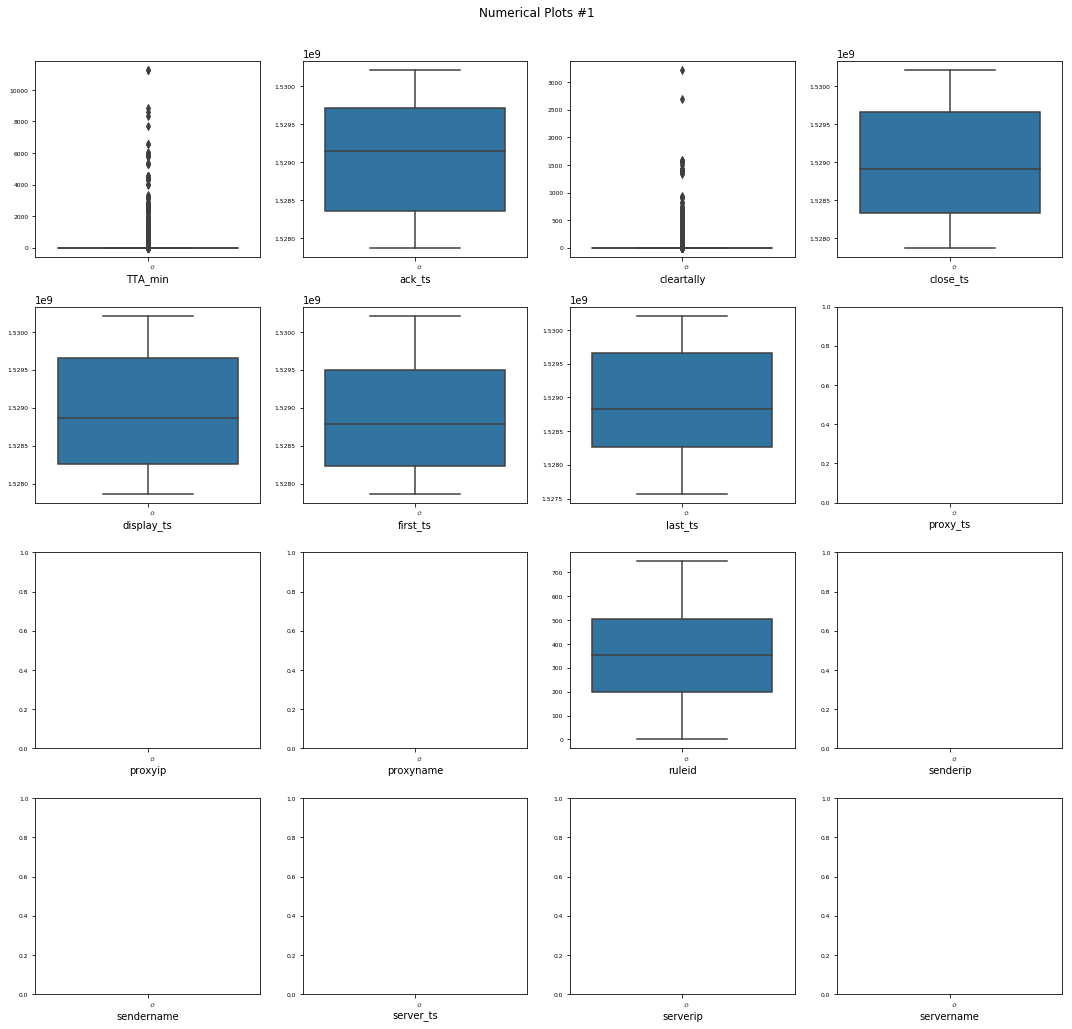

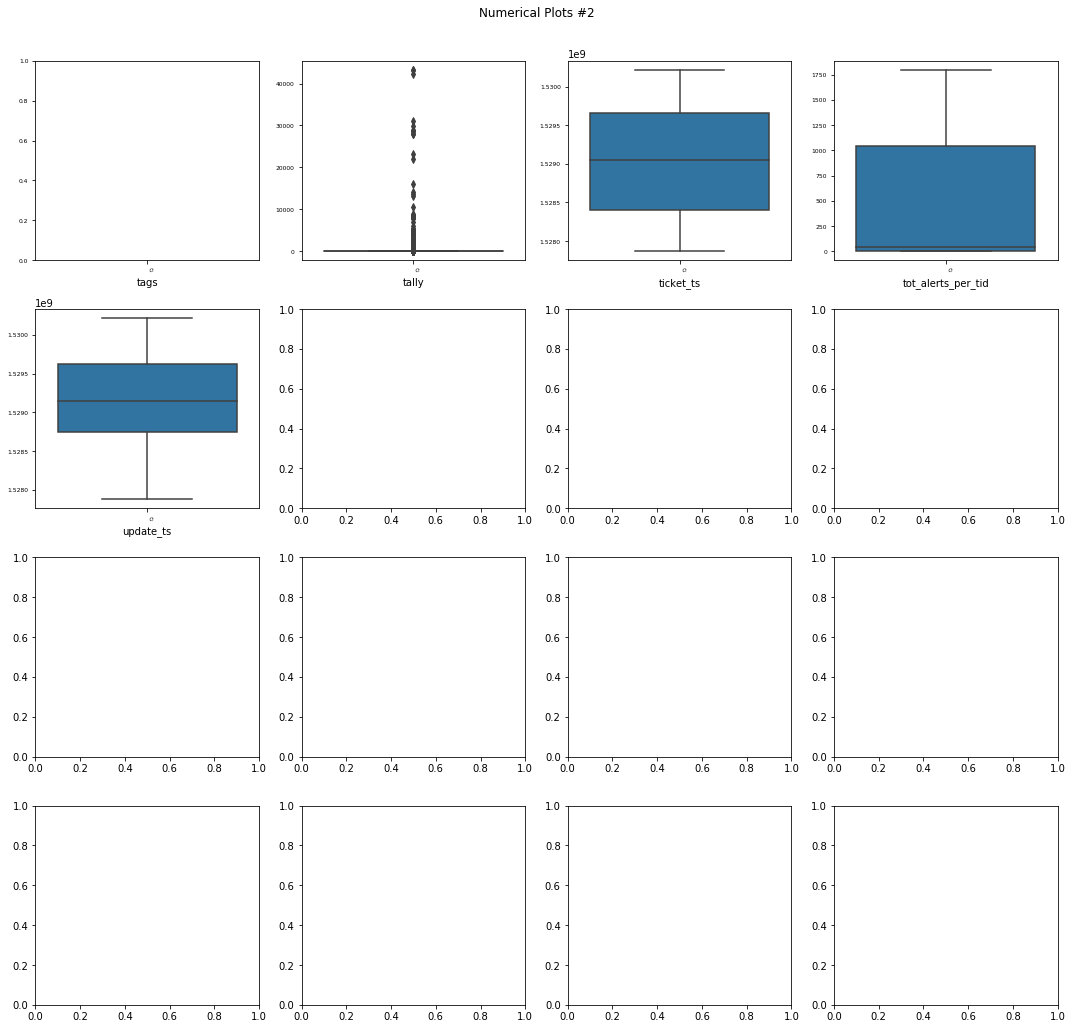

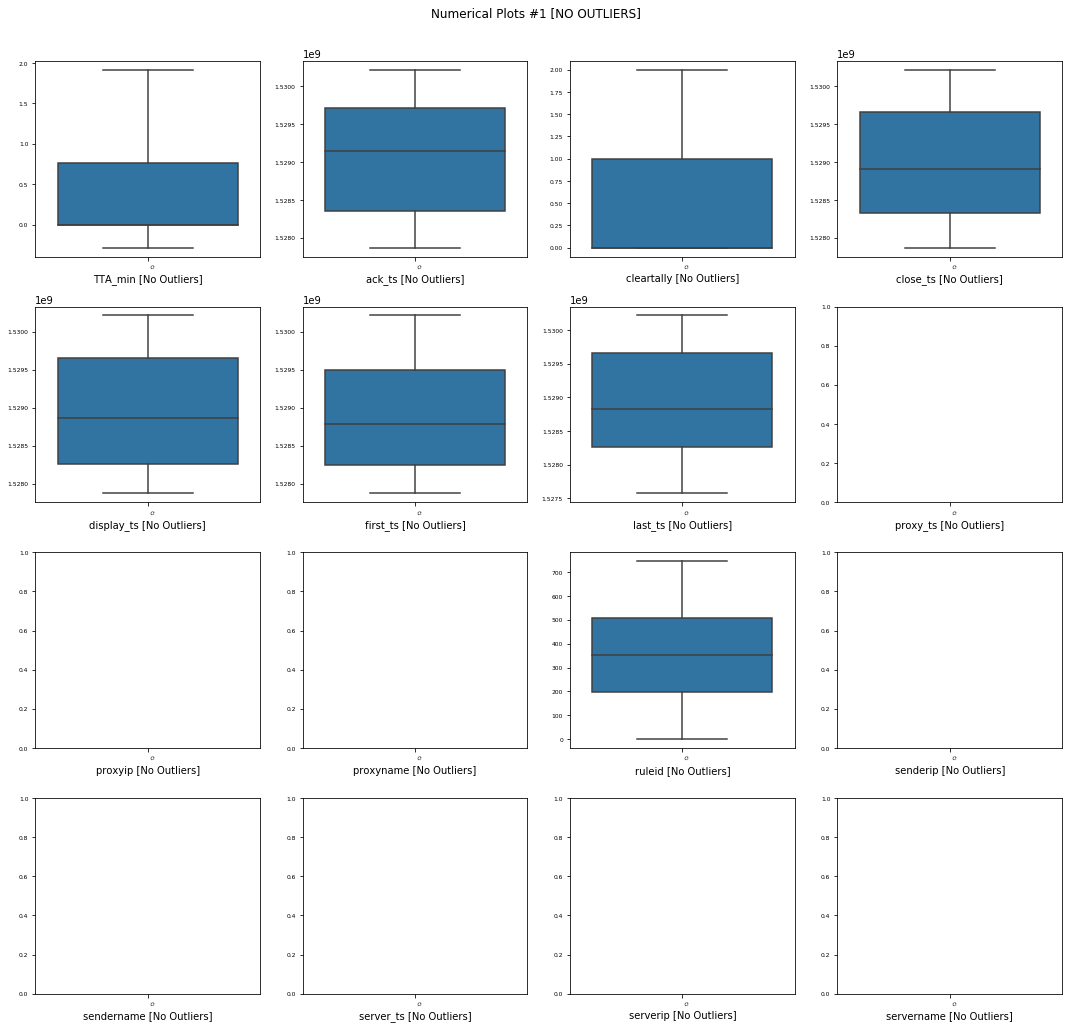

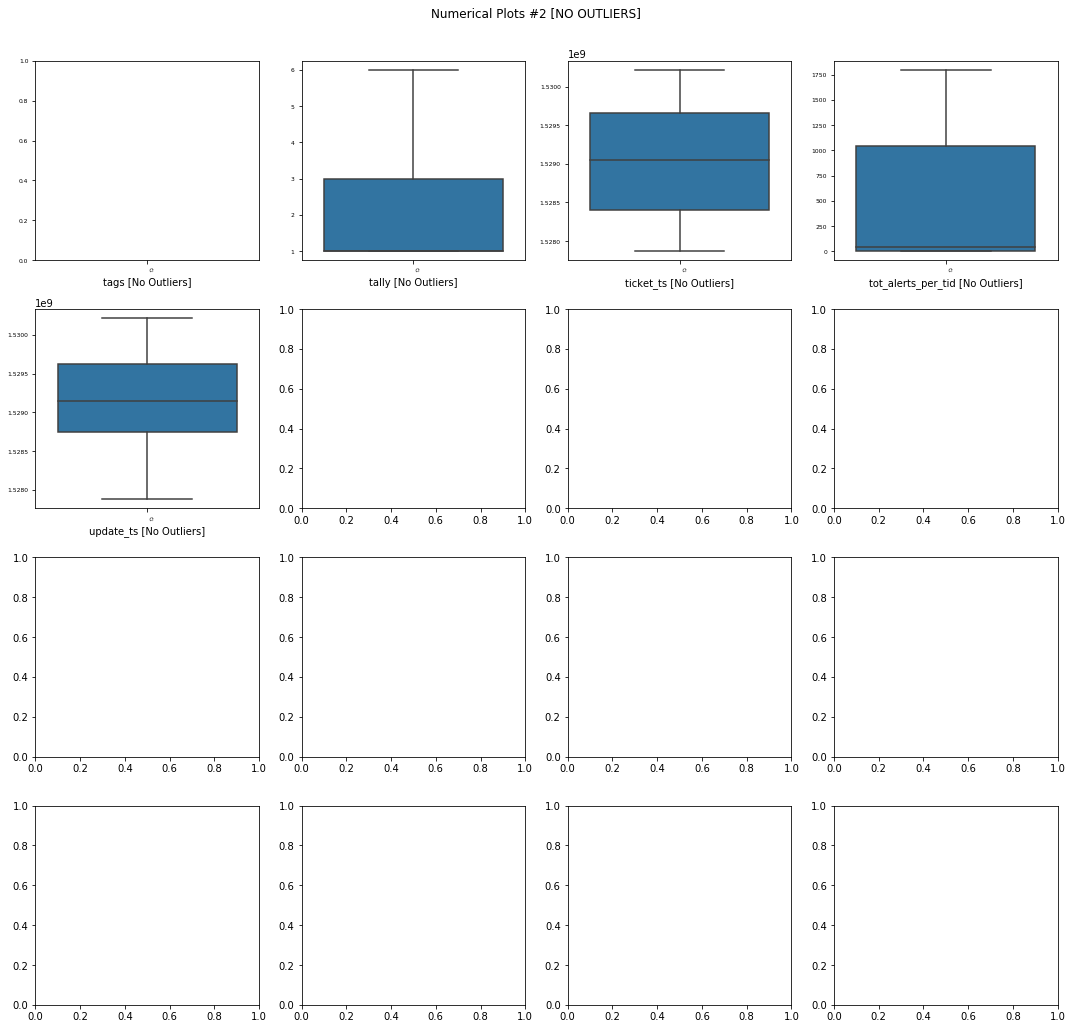

In [8]:
def plot_num_val(X, max_r, max_c):
    num_fig = math.ceil(X.shape[1] / (max_r * max_c))
    figs = [0] * num_fig * 2
    L_Xn = list(X)

    for i in range(0, num_fig):
        sub_r = max_r if math.ceil(math.sqrt(int(X.shape[1]))) > max_r else math.ceil(math.sqrt(int(X.shape[1])))
        sub_c = max_c if math.ceil(int(X.shape[1]) / sub_r) > max_c else math.ceil(int(X.shape[1]) / sub_r)
        figs[i] = plt.subplots(nrows=sub_r, ncols=sub_c, figsize = (15,15))
        plt.suptitle('Numerical Plots #' + str(i + 1))
        batch = 1
        curr_dim = sub_r * sub_c
        for j in range(i * curr_dim, (i + 1) * curr_dim):
            if j >= len(L_Xn):
                break
            plt.subplot(sub_r, sub_c, batch)
            sns.boxplot(data=X[L_Xn[j]])  # , kind = 'box')
            plt.xticks(rotation=-45, ha = 'left')
            plt.tight_layout()
            plt.tick_params(axis='both', which='major', labelsize=6)
            plt.xlabel(L_Xn[j])
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            
            batch += 1
            if batch > (sub_c * sub_r):
                break
            
        plt.savefig(VIZ_PATH + "NUMPLOT_" + str(i) + ".png", format="png")
        print("All Done with plot #" + str(i + 1))

    for i in range(0, num_fig):
        sub_r = max_r if math.ceil(math.sqrt(int(X.shape[1]))) > max_r else math.ceil(math.sqrt(int(X.shape[1])))
        sub_c = max_c if math.ceil(int(X.shape[1]) / sub_r) > max_c else math.ceil(int(X.shape[1]) / sub_r)
        figs[i + num_fig] = plt.subplots(nrows=sub_r, ncols=sub_c, figsize = (15,15))
        plt.suptitle('Numerical Plots #' + str(i + 1) + " [NO OUTLIERS]")
        batch = 1
        curr_dim = sub_r * sub_c
        for j in range(i * curr_dim, (i + 1) * curr_dim):
            if j >= len(L_Xn):
                break
            plt.subplot(sub_r, sub_c, batch)
            sns.boxplot(data=X[L_Xn[j]], showfliers = False)
            plt.xticks(rotation=-45, ha = 'left')
            plt.tight_layout()
            plt.tick_params(axis='both', which='major', labelsize=6)
            plt.xlabel(str(L_Xn[j]) + " [No Outliers]")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            print("done with subplot #" + str(batch))
            batch += 1
            if batch > (sub_c * sub_r):
                break

if X_numeric.shape[1] > 0:
    plot_num_val(X_numeric, 4, 4)

In [9]:
def data_clean(X, cat_data_valCounts, col_stats, n_freq, f_thresh, m_thresh):
    n_rows = X.shape[0]
    dropped_cols = list()
    for c in X:
        #print(cat_data_valCounts[c].head(n_freq).iloc[0])
        freq_sum = float(cat_data_valCounts[c].head(n_freq).iloc[0].sum()) if c in cat_data_valCounts.keys() else n_rows
        if freq_sum / n_rows < f_thresh or float(col_stats.loc["missing", c]) / n_rows > m_thresh:
            X.drop(labels=[c], axis = 1, inplace=True)
            print("Dropped \"" + str(c) + "\"")
            dropped_cols.append(c)
    return X, dropped_cols

X_num_cleaned, X_cat_cleaned = pd.DataFrame(), pd.DataFrame()
if X_numeric.shape[1] > 0:
    n_freq = 5
    FREQ_THRESH = 0.3
    MISS_THRESH = 0.5
    print("Cleaning Numericals...\n")
    X_num_cleaned, num_dropped = data_clean(X_numeric, cat_data_valCounts, col_stats, n_freq, FREQ_THRESH, MISS_THRESH)
    print("\n\nCleaning Categoricals...\n")
    X_cat_cleaned, cat_dropped = data_clean(X_cat, cat_data_valCounts, col_stats, n_freq, FREQ_THRESH, MISS_THRESH)
    print(X_cat_cleaned)

Cleaning Numericals...

Dropped "proxy_ts"
Dropped "proxyip"
Dropped "proxyname"
Dropped "senderip"
Dropped "sendername"
Dropped "server_ts"
Dropped "serverip"
Dropped "servername"
Dropped "tags"


Dropped "ticket_ts"
Dropped "tot_alerts_per_tid"
Dropped "update_ts"


Cleaning Categoricals...



Dropped "ackuid"
Dropped "agent"


Dropped "alertid"
Dropped "clear_ts"


Dropped "close_message"
Dropped "colo"
Dropped "component"


Dropped "display_date"
Dropped "displayuid"
Dropped "groupid"


Dropped "hostname"
Dropped "identifier"
Dropped "kblink"
Dropped "lastgroupid"


Dropped "message"
Dropped "message_md5"
Dropped "origin"
Dropped "originalgroupid"
Dropped "originalhostname"


Dropped "originalmessage"
Dropped "originalmessage_md5"
Dropped "originalurl"
Dropped "pagerdutyids"
Dropped "suborigin"
Dropped "ticketid"
Dropped "ticketsystem"
Dropped "ticketuid"


Dropped "update_by"
Dropped "url"
            Status  Number of Records  TTA_notnull  ack_ts_notnull  closecode  \
0              new                1.0          0.0             0.0        NaN   
1              new                1.0          0.0             0.0        NaN   
2          expired                1.0          0.0             0.0       99.0   
3          expired                1.0          0.0             0.0       99.0   
4          expired                1.0          0.0             0.0       99.0   
5          expired                1.0          0.0             0.0       99.0   
6          expired                1.0          0.0             0.0       99.0   
7          expired                1.0          0.0             0.0       99.0   
8          expired                1.0          0.0             0.0       99.0   
9          expired                1.0          0.0             0.0       99.0   
10         expired                1.0          0.0             0.0       99

done with cat subplot #1
done with cat subplot #2
done with cat subplot #3
done with cat subplot #4
done with cat subplot #5
done with cat subplot #6
done with cat subplot #7
done with cat subplot #8
done with cat subplot #9
done with cat subplot #10
done with cat subplot #11
done with cat subplot #12
done with cat subplot #13
done with cat subplot #14
done with cat subplot #15


done with cat subplot #16
done with cat subplot #1
done with cat subplot #2
done with cat subplot #3
done with cat subplot #4


done with cat subplot #5
done with cat subplot #6
done with cat subplot #7
done with cat subplot #8
done with cat subplot #9
done with cat subplot #10
done with cat subplot #11
done with cat subplot #12
done with cat subplot #13
done with cat subplot #14
done with cat subplot #15
done with cat subplot #16


done with cat subplot #1
done with cat subplot #2
done with cat subplot #3
done with cat subplot #4
done with cat subplot #5
done with cat subplot #6
done with cat subplot #7
done with plot #2


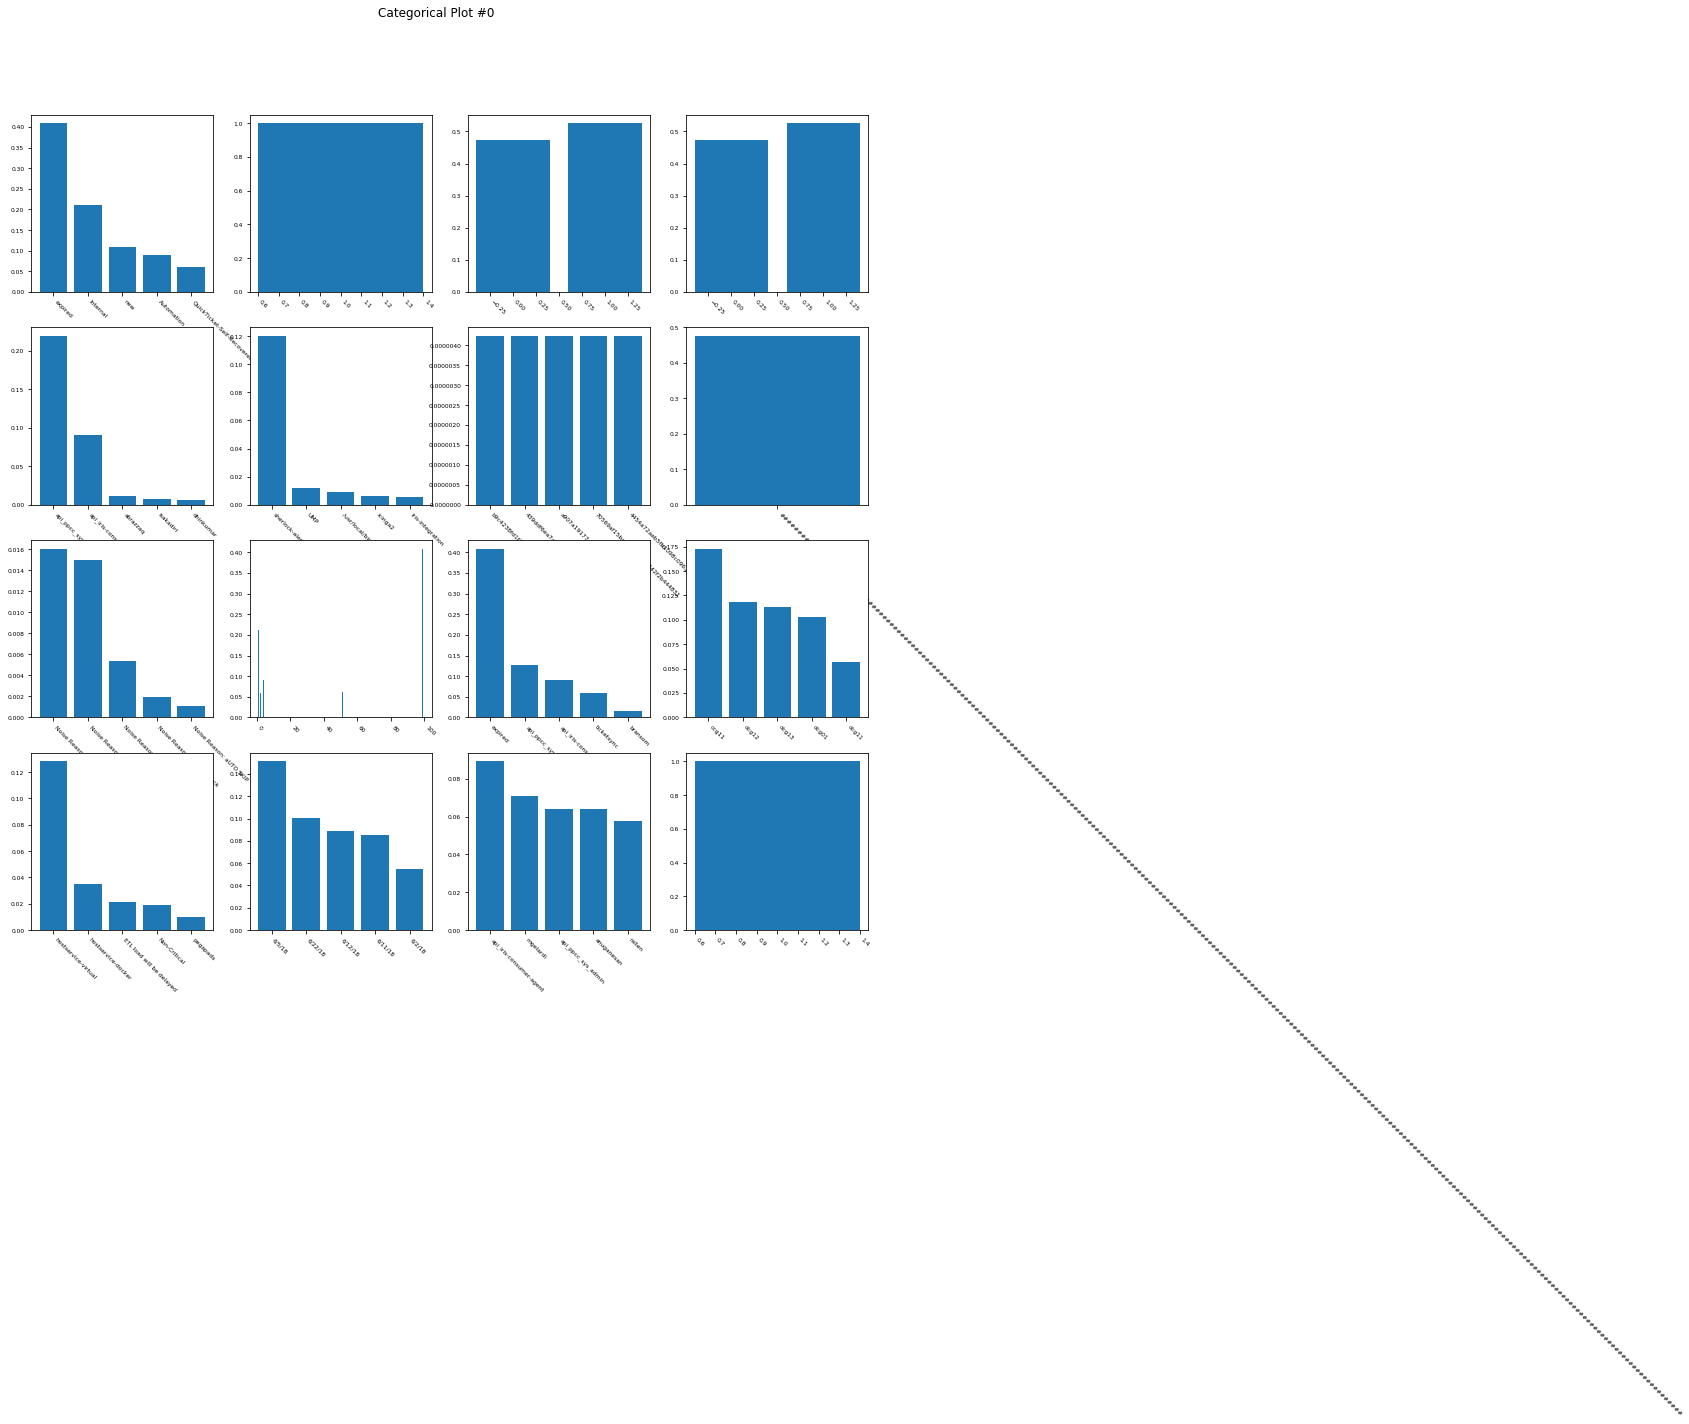

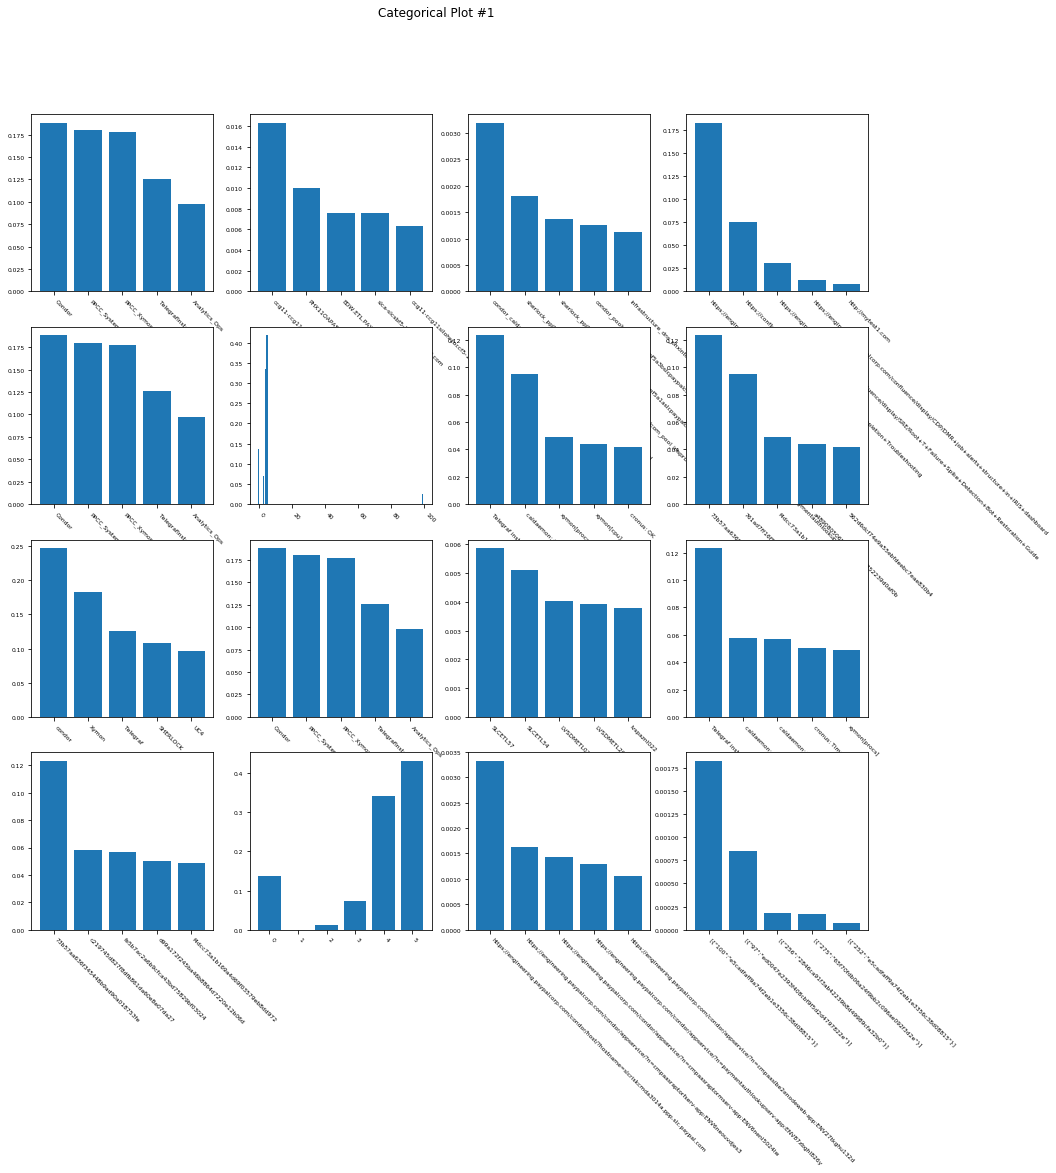

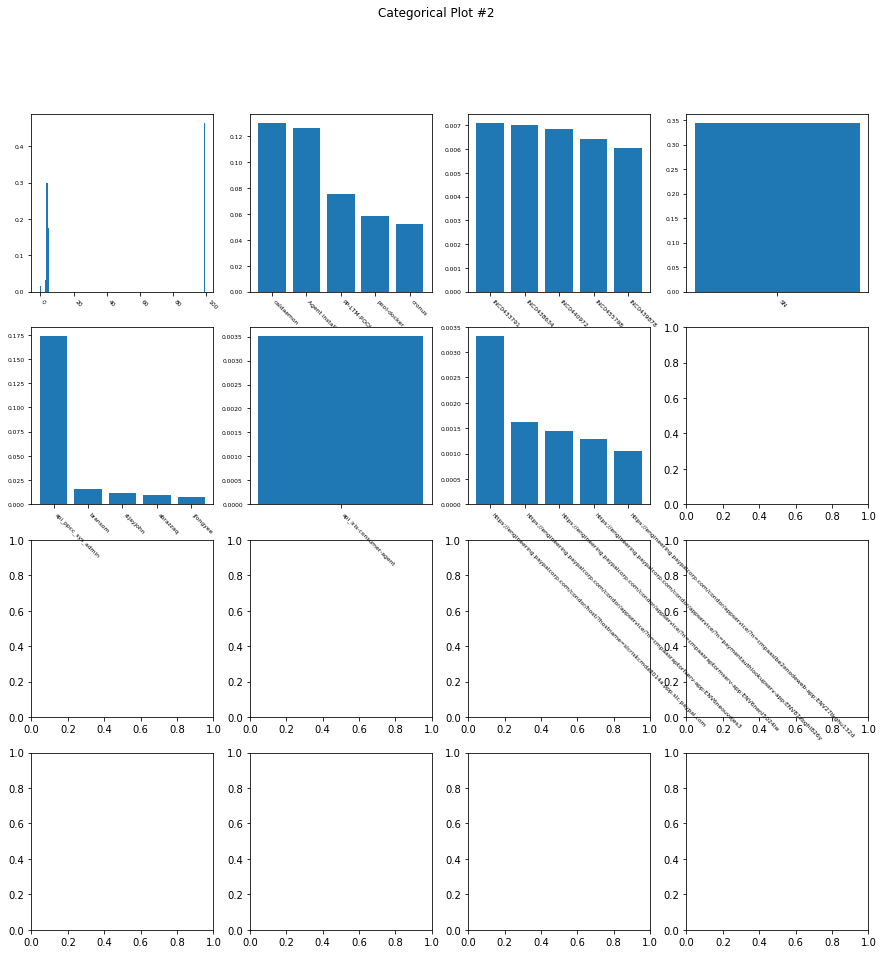

In [11]:
def plot_cat_val(cat_data_valCounts, n_rows, n_freq, max_r, max_c):
    cat_len = len(cat_data_valCounts.keys())
    if (cat_len > 0):

        sub_cat_r = max_r if math.ceil(math.sqrt(cat_len)) > max_r else math.ceil(math.sqrt(cat_len))
        sub_cat_c = max_c if math.ceil(cat_len / sub_cat_r) > max_c else math.ceil(cat_len / sub_cat_r)
        num_fig = math.ceil(float(cat_len) / (max_r * max_c))
        cdvc_keys = list(cat_data_valCounts.keys())
        curr_dim = sub_cat_c * sub_cat_r
        figs_c = [0] * num_fig
        for f_c in range(0, num_fig):
            sub_cat_r = max_r if math.ceil(math.sqrt(cat_len)) > max_r else math.ceil(math.sqrt(cat_len))
            sub_cat_c = max_c if math.ceil(cat_len / sub_cat_r) > max_c else math.ceil(cat_len / sub_cat_r)
            figs_c[f_c] = plt.subplots(nrows=sub_cat_r, ncols=sub_cat_c, figsize=(15,15))
            batch = 1
            for i in range(f_c * curr_dim, (f_c + 1) * curr_dim):
                if i >= cat_len:
                    break
                toPlt = cat_data_valCounts[cdvc_keys[i]].head(n_freq)
                plt.subplot(sub_cat_r, sub_cat_c, batch)
                plt.suptitle("Categorical Plot #" + str(f_c))
                plt.bar(toPlt.index, toPlt / float(n_rows))
                plt.xticks(rotation=-45, ha = 'left')
                plt.tick_params(axis='both', which='major', labelsize=6)
                print("done with cat subplot #" + str(batch))
                batch += 1
        print("done with plot #" + str(f_c))
    else:
        print("No categories so no category frequency graph.")

n_freq = 5
if X_cat.shape[1] > 0:
    plot_cat_val(cat_data_valCounts, X.shape[0], n_freq, 4, 4)

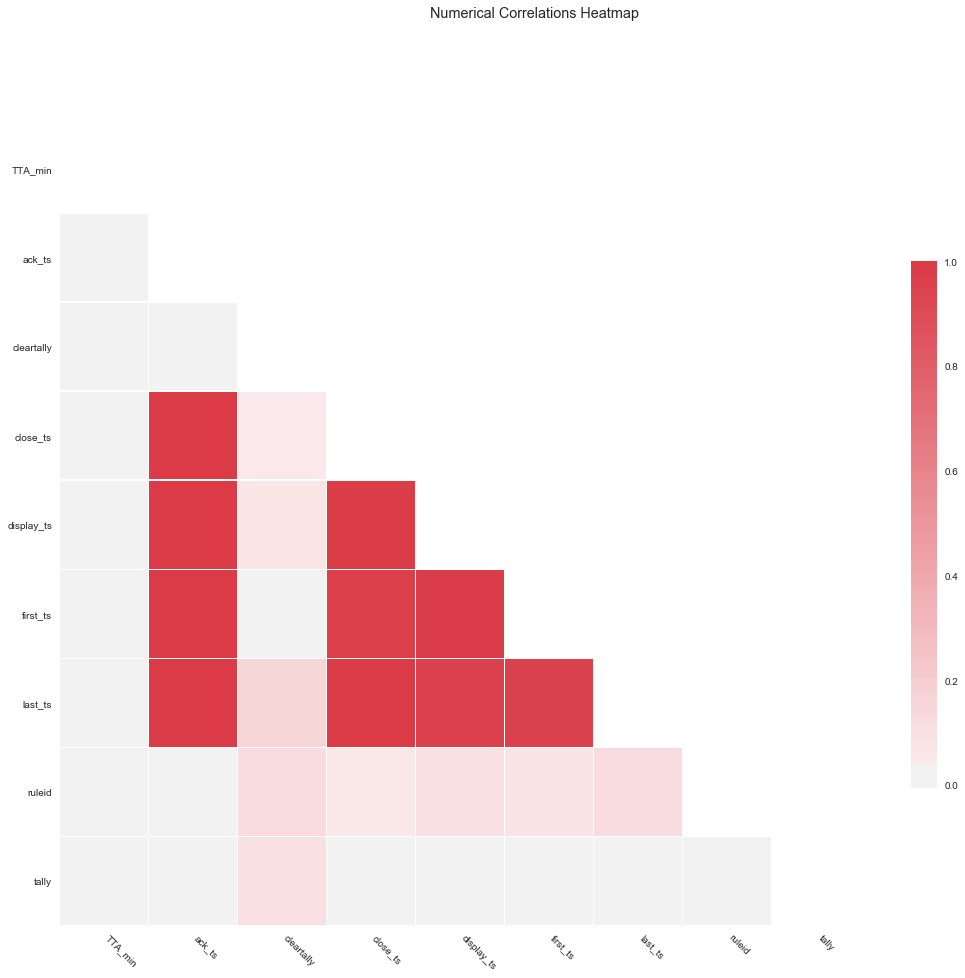

In [10]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i + 1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def plot_num_hm(X_num):
    sns.set(style="white")
    corr = X_num.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig_corr1, ax_corr1 = plt.subplots(figsize=(15,15))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    plt.suptitle("Numerical Correlations Heatmap")

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.xticks(rotation=-45, ha = 'left')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "CORRELATION_HEATMAP.png", format="png")

if X_numeric.shape[1] > 0:
    plot_num_hm(X_num_cleaned)

Top Absolute Correlations


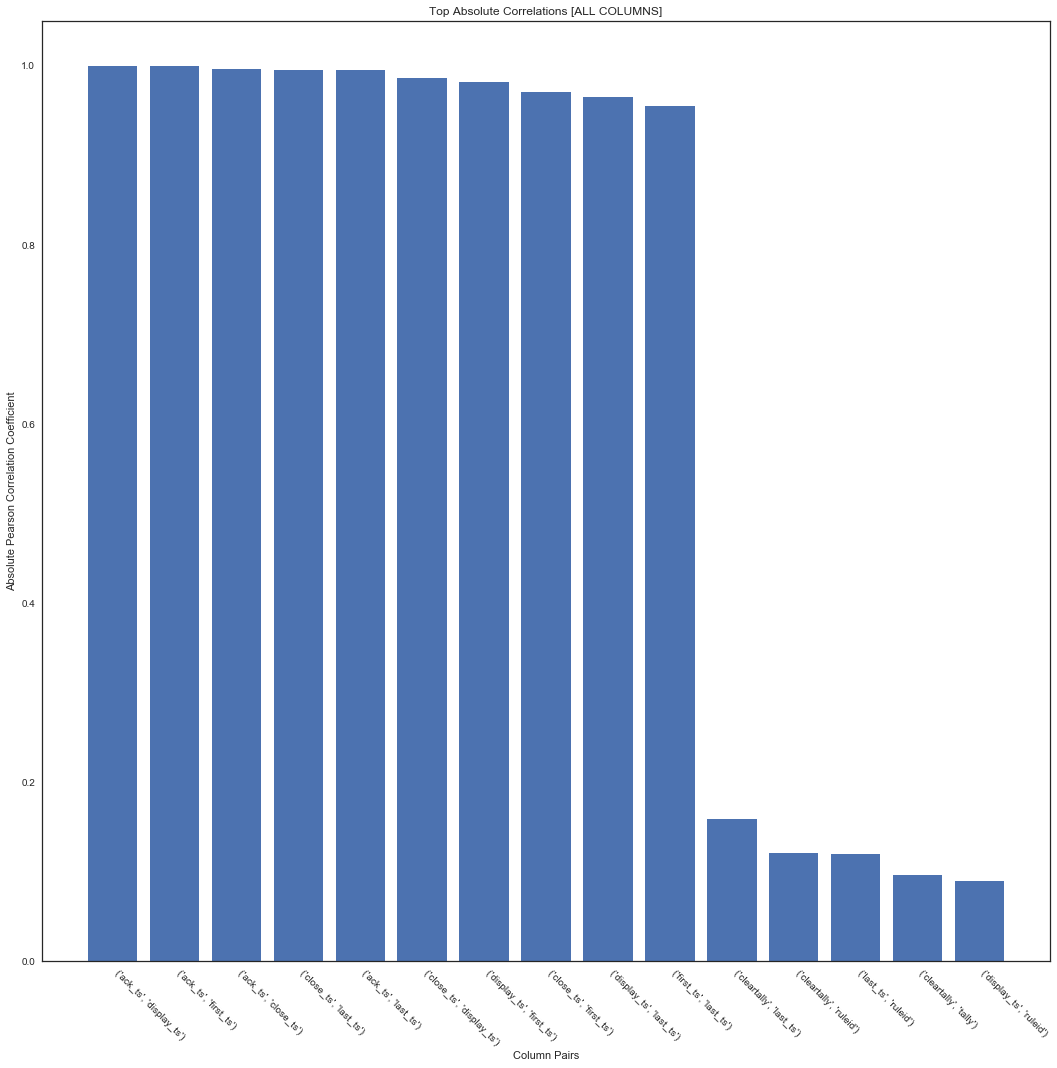

In [11]:
def plot_pairwise_corr(X_num, k):
    print("Top Absolute Correlations")
    top_corr = get_top_abs_correlations(X_num, k)
    top_corr.index = list(map(str, top_corr.index.values))
    fig_pc, ax_pc = plt.subplots(figsize=(15,15))
    plt.bar(top_corr.index, top_corr)
    plt.title("Top Absolute Correlations [ALL COLUMNS]")
    plt.xticks(rotation=-45, ha = 'left')
    plt.ylabel("Absolute Pearson Correlation Coefficient")
    plt.xlabel("Column Pairs")
    plt.tick_params(axis='both', which='major')
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "PAIRWISE_CORR.png", format="png")
    
if X_numeric.shape[1] > 0:
    k = 15
    plot_pairwise_corr(X_num_cleaned, k)

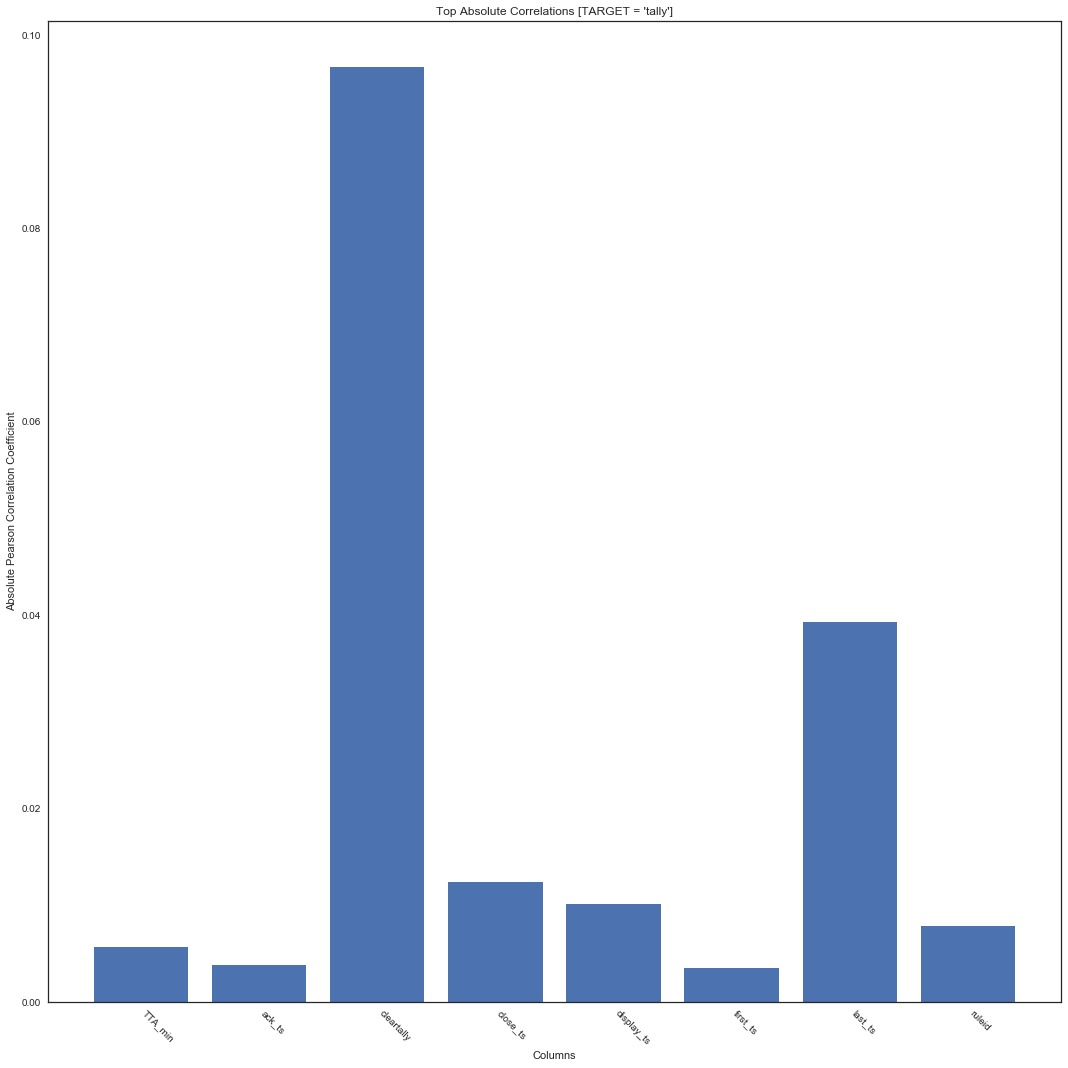

In [12]:
def plot_target_corr(targetCol, X_num):
    target_corr = X_num.corrwith(X_num[targetCol]).abs()
    target_corr = target_corr.drop([targetCol])
    fig_tc, ax_tc = plt.subplots(figsize=(15,15))
    plt.title("Top Absolute Correlations [TARGET = \'" + targetCol + "\']")
    plt.xticks(rotation=-45, ha = 'left')
    plt.ylabel("Absolute Pearson Correlation Coefficient")
    plt.xlabel("Columns")
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.bar(target_corr.index, target_corr)
    plt.tight_layout()
    plt.savefig(VIZ_PATH + "TARGET_CORR.png", format="png")

if X_numeric.shape[1] > 0:
    target = "tally" #change to desired column name
    plot_target_corr(target, X_numeric)

In [1]:
######################### CREATE CATEGORICAL VS NUMERICAL PLOTS ###################################
def map_col(X, cat_data_valCounts, n_freq):
    col_mappings = dict(dict())
    for c in X:
        if c in cat_data_valCounts.keys():
            map_build = {}
            cnt = 1
            for catcol in list(cat_data_valCounts[c].head(n_freq).index):
                map_build[catcol] = cnt
                cnt += 1
            col_mappings[c] = map_build
    pp.pprint(col_mappings)
    return col_mappings

def convert_cat_col(X_cat, col_mappings, cat_data_valCounts, n_freq):
    X_catmap = X_cat
    for c in X_cat:
        X_catmap[c] = X_cat[c].apply(
            lambda x: col_mappings[c][x] if x in cat_data_valCounts[c].head(n_freq).index else 0)
    return X_catmap


def plot_cat_vs_num_corr(X_catmap, X_num, color_ordered, cat_data_valCounts, n_freq, max_r, max_c):
    cat_dim, num_dim = X_catmap.shape[1], X_num.shape[1]
    cat_dim_fig, num_dim_fig = math.ceil(float(cat_dim) / max_c),  math.ceil(float(num_dim) / max_r)
    cat_names, num_names = list(X_catmap), list(X_num)
    # print(cat_dim_fig)
    # print(num_dim_fig)
    #figs_cn = [0] * cat_dim_fig * num_dim_fig
    OS_order = range(1, n_freq + 1)

    X_numeric_nonan = X_num.fillna(0)
    batch = 1
    print("begin plotting...")
    for f_c in range(0, cat_dim_fig):
        for f_n in range(0, num_dim_fig):
            #prepare batch of data to plot
            num_max = (f_n + 1) * max_r if (f_n + 1) * max_r < X_num.shape[1] else X_num.shape[1] - 1
            cat_max = (f_c + 1) * max_c if (f_c + 1) * max_c < X_catmap.shape[1] else X_catmap.shape[1] - 1
            X_num_batch = X_numeric_nonan.loc[:, num_names[f_n * max_r]:num_names[num_max]]
            X_cat_batch = X_catmap.loc[:, cat_names[f_c * max_c]:cat_names[cat_max]]

            X_batch = pd.concat([X_num_batch, X_cat_batch], axis=1, sort=False)

            #begin plotting
            #figs_cn[batch - 1] = plt.subplots()
            sns.set()
            sns.set_style("ticks")
            sns.set_style('darkgrid')
            print("Creating categorical vs. numerical correlation matrix graph...")
            g = sns.PairGrid(X_batch, x_vars=list(X_cat_batch), y_vars=list(X_num_batch))
            g.map(sns.stripplot, order=OS_order, jitter=0.5, s=5, alpha=0.3, palette=color_ordered)
            g.fig.suptitle("Categorical vs. Numerical Plots #" + str(batch))
            for j in range(0, len(list(X_cat_batch))):
                g.axes[0, j].set_xticklabels(list(cat_data_valCounts[list(X_cat_batch)[j]].head(n_freq).index))
            plt.rcParams["xtick.labelsize"] = 4
            for ax in g.axes.flat:
                for label in ax.get_yticklabels():
                    label.set_rotation(0)
            for ax in g.axes.flat:
                for label in ax.get_xticklabels():
                    label.set_rotation(90)
            plt.savefig(VIZ_PATH + "CAT_VS_NUM_CORR_PLOT_CATBATCH_" + str(f_c) + "_NUMBATCH_" + str(f_n) + ".png", format="png")
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            batch += 1
    print("Done!")

#applying mapping takes a while since every datapoint is encountered and changed
if (len(list(X_cat_cleaned)) * len(list(X_num_cleaned))) > 0:
    color_ordered = ['dodgerblue', 'brown', 'black', 'indianred', 'blue', 'darkviolet', 'darkgoldenrod', 'darkcyan',
                         'green', 'red', 'darkorange', 'olive', 'orchid', 'gray', 'yellowgreen', 'sandybrown']
    print("mapping...")
    col_mapping = map_col(X_cat_cleaned, cat_data_valCounts, n_freq)
    print("applying mapping...")
    X_catmap = convert_cat_col(X_cat_cleaned, col_mapping, cat_data_valCounts, n_freq)
    print("done mapping.")
    plot_cat_vs_num_corr(X_cat_cleaned, X_num_cleaned, color_ordered, cat_data_valCounts, n_freq, 10, 10)
    
else:
    print("No categories and/or numerical columns, so no category vs. numerical plot.")

NameError: name 'X_cat_cleaned' is not defined

In [2]:
def plot_date_val(X_date, X_num):
    figs = [0] * len(list(X_date))
    i = 0
    for d in X_date:
        print(X_date[d])
        Xd = X_date[d].dropna()
        #print(Xd.month)
        print("done printing input")
        n_rows = Xd.shape[0]
        b = pd.DataFrame(index = Xd)
        print(b)
        try:
            gbc = Xd.groupby(by=[Xd.dt.day.rename('d'), Xd.dt.month.rename('m'), Xd.dt.year.rename('y')]).count()
            print(gbc)
            #new_index = gbc.index.to_datetime(df.y*10000+df.*100+df.D,format='%Y%m%d')
            # figs[i] = plt.subplots()
            # plt.plot(gbc['d'], gbc.values())
            # i += 1
        except AttributeError:
            print("Column \"" + d + "\" is not datelike.")
        print(Xd.shape[0])
        print(gbc)

print(X_date)
plot_date_val(X_date)

NameError: name 'X_date' is not defined